# C - Scaling

Environment für dieses Notebook: `ads-ml-light` (*requirements-py3.11-ads-ml-light.txt*).

## Daten einlesen

In [1]:
import pandas as pd

data = pd.read_parquet("../data/subset_baumkataster_frankfurt_2021.parquet")

In [2]:
data.describe()

,baumhoehe,kr_durchm,st_umfang,pflanzjahr
count,14949.000000,14949.000000,14949.000000,14949.000000
mean,12.579905,7.203960,103.676233,1980.993311
std,5.641162,3.907166,64.437457,28.145693
min,0.000000,2.000000,0.000000,1800.000000
25%,8.000000,4.000000,55.000000,1965.000000
50%,12.000000,7.000000,90.000000,1986.000000
75%,17.000000,10.000000,141.000000,2004.000000
max,35.000000,26.000000,816.000000,2021.000000


In [3]:
data.head()

,gattung,ga_lang,baumhoehe,kr_durchm,st_umfang,pflanzjahr
75,Tilia,"Tilia species, Linde",6,3.0,44.0,2007
77,Tilia,"Tilia x vulgaris -Pallida-, Kaiser-Linde",7,5.0,75.0,2002
79,Tilia,"Tilia species, Linde",16,9.0,148.0,1955
81,Tilia,"Tilia x flaccida, Amerikanische Hybrid-Linde",19,7.0,151.0,1955
82,Tilia,"Tilia platyphyllos, Sommer-Linde",7,4.0,53.0,2002


## Standard Scaler

In [4]:
from sklearn.preprocessing import StandardScaler

sd_scaler = StandardScaler()
sd_scaler.fit(data[["baumhoehe"]])
sd_t = sd_scaler.transform(data[["baumhoehe"]])
sd_t

array([[-1.16644858],
       [-0.9891742 ],
       [ 0.60629522],
       ...,
       [-1.16644858],
       [-1.16644858],
       [-2.23009486]])

In [5]:
pd.DataFrame(sd_t).describe()

,0
count,1.494900e+04
mean,4.562988e-17
std,1.000033e+00
min,-2.230095e+00
25%,-8.118998e-01
50%,-1.028023e-01
75%,7.835696e-01
max,3.974508e+00


In [8]:
pd.DataFrame(sd_t).describe().style.format("{:.6f}")

,0
count,14949.000000
mean,0.000000
std,1.000033
min,-2.230095
25%,-0.811900
50%,-0.102802
75%,0.783570
max,3.974508


## Robust Scaler

In [10]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
rob_scaler.fit(data[["baumhoehe"]])
rob_t = rob_scaler.transform(data[["baumhoehe"]])
rob_t

array([[-0.66666667],
       [-0.55555556],
       [ 0.44444444],
       ...,
       [-0.66666667],
       [-0.66666667],
       [-1.33333333]])

In [11]:
pd.DataFrame(rob_t).describe()

,0
count,14949.000000
mean,0.064434
std,0.626796
min,-1.333333
25%,-0.444444
50%,0.000000
75%,0.555556
max,2.555556


## MinMax Scaler

In [12]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaler.fit(data[["baumhoehe"]])
mm_t = mm_scaler.transform(data[["baumhoehe"]])
mm_t

array([[0.17142857],
       [0.2       ],
       [0.45714286],
       ...,
       [0.17142857],
       [0.17142857],
       [0.        ]])

In [13]:
pd.DataFrame(mm_t).describe()

,0
count,14949.000000
mean,0.359426
std,0.161176
min,0.000000
25%,0.228571
50%,0.342857
75%,0.485714
max,1.000000


## Quantile Transformer

In [14]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution="normal")
qt.fit(data[["baumhoehe"]])
qt_t = qt.transform(data[["baumhoehe"]])
qt_t

array([[-1.18444682],
       [-0.88459264],
       [ 0.55985906],
       ...,
       [-1.18444682],
       [-1.18444682],
       [-5.19933758]])

In [15]:
pd.DataFrame(qt_t).describe()

,0
count,14949.000000
mean,-0.003894
std,0.990157
min,-5.199338
25%,-0.625670
50%,0.037646
75%,0.708752
max,5.199338


## Vergleich der Scaler

In [16]:
dists = pd.DataFrame(
    {
        "Standard": sd_t.flatten(),
        "Robust": rob_t.flatten(),
        "MinMax": mm_t.flatten(),
        "QuantileTransformer": qt_t.flatten(),
    }
)
dists.head()

,Standard,Robust,MinMax,QuantileTransformer
0,-1.166449,-0.666667,0.171429,-1.184447
1,-0.989174,-0.555556,0.200000,-0.884593
2,0.606295,0.444444,0.457143,0.559859
3,1.138118,0.777778,0.542857,1.008294
4,-0.989174,-0.555556,0.200000,-0.884593


<Axes: ylabel='Density'>

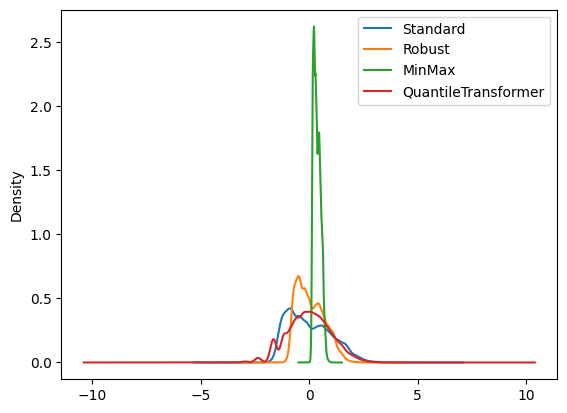

In [17]:
dists.plot.kde()